### Import packages

In [2]:
# %pip install scipy

import pandas as pd
import os
import numpy as np
import seaborn as sb
import scipy.stats as stats
import scipy
import ast
import warnings
import pylab
import matplotlib.pyplot as plt
import math
warnings.filterwarnings('ignore')

### Load & Organize Data

In [3]:
path       = 'behavioral_data/'
subjects   = [ path+x for x in os.listdir(path) if 'subject' in x and 'subject_17' not in x  ]
csv_ignore = [ x for x in os.listdir('.') if 'disregard' in x ] 
csv_ignore = [ list(pd.read_csv(x).loc[1])[1][:-3]+'csv' for x in csv_ignore ]

In [4]:
# csv_ignore

### Define functions

In [5]:
def load_dataframe(sub_path, ignore=[]):
    
    files = [ sub_path+'/'+x for x in os.listdir(sub_path) if '.csv' in x ]
    files = [ x for x in files if x not in ignore]
    df    = pd.concat( [ pd.read_csv(x) for x in files ] )
    
    return(df)

### Get total number of trials not responded per subject

In [6]:
total_no_response_trials = []

for s in subjects:
    
    df = load_dataframe(s)
    df = df[~df['type'].isna()]
    
    dat = df[~df['key_resp_9.keys'].isin(["['1']","['2']",
                                                  "['1', '1']","['2', '2']",
                                                  "['1', '2']","['2', '1']"
                                                 ])]
    
    # NOTE: check that nobody ever had three responses entered during the response period
    # (I think that's the case, just make extra sure)
    
    no_response = dat.shape[0]
    
    if no_response > 0:
        print(s)
        print(dat['key_resp_9.keys'].unique())
    
    total_no_response_trials.append(no_response)

print()
print('^^ the only no-response trials are ones with nan in the response column')
print()

behavioral_data/subject_15
['None']
behavioral_data/subject_23
['None']
behavioral_data/subject_14
['None']
behavioral_data/subject_13
['None']
behavioral_data/subject_4
['None']
behavioral_data/subject_2
['None']
behavioral_data/subject_16
['None']
behavioral_data/subject_11
['None']
behavioral_data/subject_20
['None']
behavioral_data/subject_21
['None']
behavioral_data/subject_19
['None']
behavioral_data/subject_10
['None']
behavioral_data/subject_9
['None']
behavioral_data/subject_1
['None']

^^ the only no-response trials are ones with nan in the response column



In [7]:
total_no_response_trials

[0, 8, 4, 0, 3, 8, 9, 0, 7, 0, 1, 2, 0, 4, 37, 5, 7, 0, 2, 0, 0, 3]

### Get breakdown of non-response by run

In [8]:
new_dataframe = []

for s in subjects:
    
    df = load_dataframe(s)
    df = df[~df['type'].isna()]
        
    dat = df[~df['key_resp_9.keys'].isin(["['1']","['2']",
                                                  "['1', '1']","['2', '2']",
                                                  "['1', '2']","['2', '1']"
                                                 ])]
    mismatch = df[df['key_resp_9.keys'].isin([ "['1', '2']" , "['2', '1']" ])]
    
    if mismatch.shape[0]>0:
        print(s)
        print(mismatch.shape[0])
    
    new_df = dat.groupby(['run'],as_index=False).count()[['run','moviestim']]
    new_df['subject'] = s
    
    new_dataframe.append(new_df)
    
run_df = pd.concat(new_dataframe)

behavioral_data/subject_14
1
behavioral_data/subject_16
1


<Axes: ylabel='moviestim'>

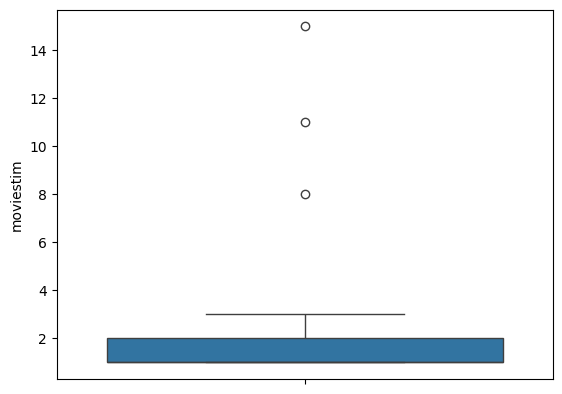

In [9]:
sb.boxplot(run_df['moviestim'])

<Axes: ylabel='moviestim'>

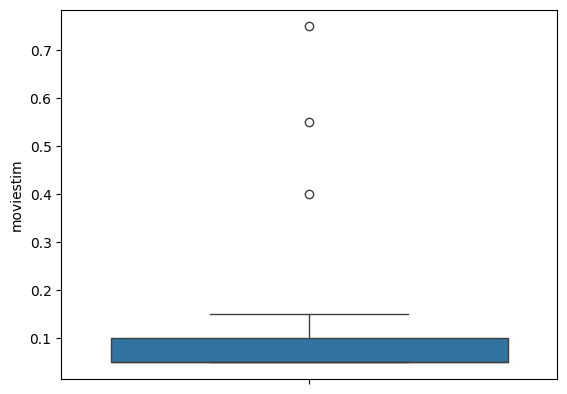

In [10]:
sb.boxplot(run_df['moviestim']/20)

In [11]:
exclude_df = run_df[run_df['moviestim']>3]
exclude_df

,run,moviestim,subject
1,2.0,8,behavioral_data/subject_21
2,3.0,15,behavioral_data/subject_21
3,4.0,11,behavioral_data/subject_21


In [12]:
exclude_df.to_csv('exclude_runs_behavioral.csv')